In [ ]:
# Create an at https://apps.compu-flair.com/user/register
# Go to https://apps.compu-flair.com/
# In the ChatAI, search for: RAG multimodal

# ChatAI:
# =======
# Hello! Please describe the analysis you are interested in.

# You:
# ====
# RAG multimodal

# ChatAI:
# =======
# To address your query about RAG (Retrieval-Augmented Generation) in a multimodal context, I will refer to Pipeline ID 4675, which focuses on utilizing images alongside text in RAG applications.
# 
# In this pipeline, we explore how to effectively incorporate both text and images to enhance information retrieval and synthesis. The approach involves the following steps:
# 
# 1. **Parsing Documents**: We use Unstructured to extract various content types, including images, text, and tables from documents (PDFs).
# 
# 2. **Embedding**: We employ multimodal embeddings, such as CLIP, to create embeddings for both images and text. This allows us to represent the different content types in a unified vector space.
# 
# 3. **Retrieval**: Using similarity search, we can retrieve both images and text based on their embeddings, ensuring that relevant information from both modalities is accessible.
# 
# 4. **Answer Synthesis**: Finally, we pass the raw images and text chunks to a multimodal LLM (like GPT-4V) for answer synthesis, enabling the model to generate comprehensive responses that leverage information from both text and images.
# 
# This approach aims to overcome the limitations of traditional RAG applications, where information captured in images is often overlooked. By integrating multimodal capabilities, we can enhance the richness and accuracy of the generated responses.
# 
# If you have any specific questions or need further details about this pipeline, feel free to ask!
# 
# Select a Pipeline to Get Into its Details: 
# Options ...

# Select the pipeline you want more details. For instance, (Pipeline ID 4675) -- Chroma multi-modal RAG ...
# Then you'll have the python code to implement it.

# You:
# ====
# Summarize the key steps in this pipeline.

# ChatAI
# ======
# The main steps involved in the RAG (Retrieval-Augmented Generation) multimodal pipeline for processing and analyzing images and text are as follows:
#
# 1. **Data Loading**:
# - Extract text and images from documents (e.g., PDFs) using the `partition_pdf` function from the Unstructured library. This step involves specifying whether to extract images and categorizing the extracted elements into texts and tables.
#
# 2. **Multi-modal Embeddings**:
# - Utilize OpenCLIP multimodal embeddings to create embeddings for both images and text. This is done by initializing a Chroma vector store with the OpenCLIP embeddings function, which allows for the storage and retrieval of both content types.
#
# 3. **Adding Content to Vector Store**:
# - Add the extracted images and texts to the Chroma vector store. This enables the retrieval of relevant content based on user queries.
#
# 4. **Creating a Retriever**:
# - Create a retriever from the vector store, which will be used to fetch relevant images and texts based on user-provided keywords.
# 
# 5. **Input Formatting**:
# - Format the inputs using a `RunnableLambda` that prepares the context (both texts and images) and the question. This involves creating a prompt function that constructs a message for the multimodal model (e.g., GPT-4V) by combining the retrieved images and texts.
#
# 6. **Model Invocation**:
# - Pass the formatted inputs to the multimodal model (e.g., ChatOpenAI with GPT-4V) to generate a response. The model processes the combined information and produces an output based on the analysis of the images and related texts.
# 
# 7. **Output Parsing**:
# - Parse the output from the model into a string format for easier interpretation and presentation.
#
# 8. **Testing and Visualization**:
# - Test the retrieval process by invoking the retriever with specific queries and displaying the retrieved images and texts. This step may involve rendering images in a notebook environment and printing out the associated text content.
# 
# By following these steps, the pipeline effectively integrates both image and text data to provide comprehensive analyses and responses based on user queries.

# You:
# ====
# raw_pdf_elements = partition_pdf(
#     filename=path + "photos.pdf",
#     extract_images_in_pdf=True,
#     infer_table_structure=True,
#     chunking_strategy="by_title",
#     max_characters=4000,
#     new_after_n_chars=3800,
#     combine_text_under_n_chars=2000,
#     image_output_dir_path=path,
# )
#
# tables = []
# texts = []
# for element in raw_pdf_elements:
#     if "unstructured.documents.elements.Table" in str(type(element)):
#         tables.append(str(element))
#     elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
#         texts.append(str(element))
#
# explain this code

# ChatAI
# ======
#
# The code provided extracts content from a PDF file, including images and tables, using the `partition_pdf` function from the `unstructured` library. Here's a breakdown of how it works, including the parameters used for text chunking and output options:
# 
# ### Code Breakdown
# 
# 1. **Importing Required Libraries**:
# The code begins by importing the necessary function from the `unstructured` library:
# 
#    from unstructured.partition.pdf import partition_pdf
# 
# 2. **Setting the File Path**:
# The path to the PDF file is specified:
# 
#    path = "/Users/rlm/Desktop/photos/"
# 
# 3. **Extracting Content from the PDF**:
# The `partition_pdf` function is called to extract text, images, and tables from the specified PDF file:
# 
#    raw_pdf_elements = partition_pdf(
#        filename=path + "photos.pdf",
#        extract_images_in_pdf=True,
#        infer_table_structure=True,
#        chunking_strategy="by_title",
#        max_characters=4000,
#        new_after_n_chars=3800,
#        combine_text_under_n_chars=2000,
#        image_output_dir_path=path,
#    )
#
# ### Parameters Explained
# - **`filename`**: This parameter specifies the path to the PDF file that you want to process.
# 
# - **`extract_images_in_pdf=True`**: This option indicates that images should be extracted from the PDF. If set to `False`, only text will be processed.
# 
# - **`infer_table_structure=True`**: This parameter allows the function to attempt to identify and structure any tables present in the PDF.
# 
# - **`chunking_strategy="by_title"`**: This strategy determines how the text is chunked. In this case, it chunks the text based on titles, which helps in organizing the extracted content logically.
# 
# - **`max_characters=4000`**: This sets the maximum number of characters for each text chunk. If a chunk exceeds this limit, it will be split.
# 
# - **`new_after_n_chars=3800`**: This parameter specifies that a new chunk should be created after 3800 characters, allowing for some flexibility in chunk size.
# 
# - **`combine_text_under_n_chars=2000`**: This option allows smaller text elements (under 2000 characters) to be combined into a single chunk, which can help in maintaining context.
# 
# - **`image_output_dir_path=path`**: This specifies the directory where the extracted images will be saved.
#
# ### Categorizing Extracted Elements
#
# After extracting the content, the code categorizes the elements into tables and texts:
# 
# tables = []
# texts = []
# for element in raw_pdf_elements:
#     if "unstructured.documents.elements.Table" in str(type(element)):
#         tables.append(str(element))
#     elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
#         texts.append(str(element))
# 
# - **Looping through `raw_pdf_elements`**: The code iterates through each element extracted from the PDF.
# - **Identifying Tables**: If the element is identified as a table, it is appended to the `tables` list.
# - **Identifying Texts**: If the element is identified as a composite text element, it is appended to the `texts` list.
# ### Summary
# In summary, the provided code effectively extracts text, images, and tables from a PDF file using specified parameters for chunking and output options. The parameters allow for flexibility in how the content is processed, ensuring that the extracted information is organized and accessible for further analysis or retrieval.

In [3]:
# pip install "unstructured[all-docs]"
# brew install poppler
# brew install tesseract 

# ˜/.pyenv/versions/3.12.5/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
# from .autonotebook import tqdm as notebook_tqdm
# https://ipywidgets.readthedocs.io/en/stable/user_install.html
# pip install ipywidgets

In [ ]:
path = "./documents/"

# https://arxiv.org/pdf/2408.00026v1
filename = "2408.00026v1.pdf"

# Extract images, tables, and chunks of text...
from unstructured.partition.pdf import partition_pdf

raw_pdf_elements = partition_pdf(
    filename=path + filename,
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,   
    image_output_dir_path=path
)

# Categorize text elements by type
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

# Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
# - This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
# - This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


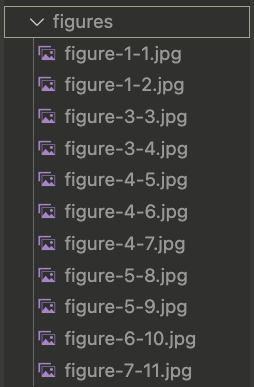

In [ ]:
print(tables)
print(len(tables))
# ['Model Component Parameters LEIA WABS nH (1020 cm2) 2.13 (frozen) APEC KT (keV) 2.1+0.3 −0.1 Abun (metal abundances) 0.30 (frozen) z (redshift) 0.00428 (frozen) χ2/DOF norm 0.99+0.04 −0.02 187.62/151']
# 1

In [ ]:
print(texts)
print(len(texts))
# ['ea universe\n\nArticle\n\nStudy of ... ... ...]
# 10

In [ ]:
# pip install open_clip_torch torch

import os
import uuid

import chromadb
import numpy as np
from langchain_chroma import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
from PIL import Image as _PILImage

# Create chroma
vectorstore = Chroma(
    collection_name="mm_rag_clip_photos", embedding_function=OpenCLIPEmbeddings()
)

path = "figures"

In [10]:
# Get image URIs with .jpg extension only
image_uris = sorted(
    [
        os.path.join(path, image_name)
        for image_name in os.listdir(path)
        if image_name.endswith(".jpg")
    ]
)

In [11]:
# Add images
vectorstore.add_images(uris=image_uris)

# Add documents
vectorstore.add_texts(texts=texts)

# Make retriever
retriever = vectorstore.as_retriever()

In [13]:
import base64
import io
from io import BytesIO


import numpy as np
from PIL import Image

In [14]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string.
    
    Args:
    base64_string (str): Base64 string of the original image.
    size (tuple): Desired size of the image as (width, height).

    Returns:
    str: Base64 string of the resized image.
    """
    
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

def is_base64(s):
    """Check if a string is Base64 encoded"""
    try:
        return base64.b64encode(base64.b64decode(s)) == s.encode()
    except Exception:
        return False

def split_image_text_types(docs):
    """Split numpy array images and texts"""
    images = []
    text = []
    for doc in docs:
        doc = doc.page_content  # Extract Document contents
        if is_base64(doc):
            # Resize image to avoid OAI server error
            images.append(
                resize_base64_image(doc, size=(250, 250))
            )  # base64 encoded str
        else:
            text.append(doc)
    return {"images": images, "texts": text}

In [15]:
from operator import itemgetter

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_openai import ChatOpenAI

In [16]:
def prompt_func(data_dict):
    # Joining the context texts into a single string
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        image_message = {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{data_dict['context']['images'][0]}"
            },
        }
        messages.append(image_message)

    # Adding the text message for analysis
    text_message = {
        "type": "text",
        "text": (
            "As an expert art critic and historian, your task is to analyze and interpret images, "
            "considering their historical and cultural significance. Alongside the images, you will be "
            "provided with related text to offer context. Both will be retrieved from a vectorstore based "
            "on user-input keywords. Please use your extensive knowledge and analytical skills to provide a "
            "comprehensive summary that includes:\n"
            "- A detailed description of the visual elements in the image.\n"
            "- The historical and cultural context of the image.\n"
            "- An interpretation of the image's symbolism and meaning.\n"
            "- Connections between the image and the related text.\n\n"
            f"User-provided keywords: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)

    return [HumanMessage(content=messages)]

In [17]:
model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=1024)

# RAG pipeline
chain = (
    {
        "context": retriever | RunnableLambda(split_image_text_types),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(prompt_func)
    | model
    | StrOutputParser()
)

In [ ]:
chain.invoke("describe the mdpi logo")

# '### Detailed Description of the Visual Elements in the Image\n\nThe image is a logo featuring the acronym "MDPI" in bold, black letters. The letters are enclosed within a stylized hexagonal shape, which is open at the top and bottom. The design is simple and geometric, emphasizing clarity and modernity.\n\n### Historical and Cultural Context of the Image\n\nMDPI stands for Multidisciplinary Digital Publishing Institute, a publisher known for its open-access journals. Founded in 1996, MDPI has grown to become a significant player in the academic publishing industry, promoting open access to scientific research. The logo reflects the organization\'s commitment to accessibility and innovation in scholarly communication.\n\n### Interpretation of the Image\'s Symbolism and Meaning\n\nThe hexagonal shape surrounding the "MDPI" acronym can symbolize structure and organization, akin to a molecular or chemical structure, which aligns with the scientific focus of the publisher. The open ends of the hexagon may represent openness and inclusivity, key principles of open-access publishing. The bold typography conveys strength and reliability.\n\n### Connections Between the Image and the Related Text\n\nThe text discusses advanced X-ray focusing technology and its applications in astronomy, specifically mentioning MDPI as the licensee of the article. This connection highlights MDPI\'s role in disseminating cutting-edge scientific research. The logo\'s modern and structured design complements the innovative and technical nature of the content, reinforcing MDPI\'s identity as a facilitator of scientific progress and knowledge sharing.'